In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline


from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
from gensim.models import Word2Vec
from tqdm import tqdm

In [3]:
dataset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')

In [4]:
dataset.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
testset.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
dataset.drop(columns=['id'],inplace=True)
testset.drop(columns=['id'],inplace=True)

In [7]:
testset.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [8]:
dataset.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
dataset.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [10]:
testset.isnull().sum()

comment_text    0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [12]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  153164 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


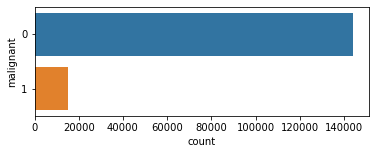

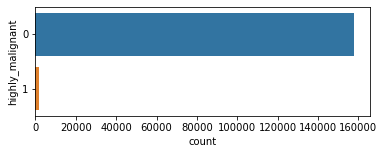

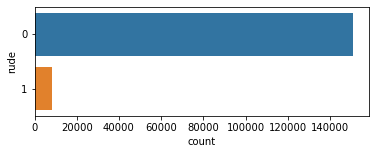

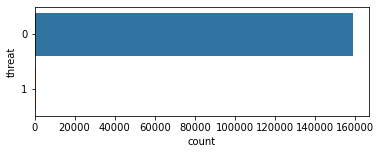

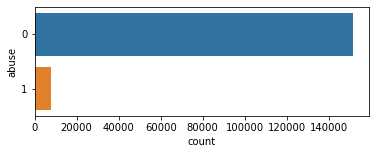

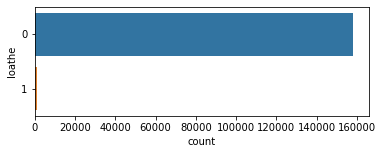

In [13]:
x=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in x:
    plt.figure(figsize = (6,2))
    sns.countplot(y=i ,data=dataset)

In [14]:
len(dataset.comment_text)

159571

In [15]:
dataset['length_of_comment']=dataset.comment_text.str.len()
dataset.head(6)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_of_comment
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65


In [16]:
newset=dataset

In [17]:
newset.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_of_comment
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [18]:
def decontracted(phrase):
    phrase = re.sub(r"’","'",phrase)
    phrase = re.sub(r"”",'"',phrase)
    phrase = re.sub(r"“",'"',phrase)
    phrase = re.sub(r"n\'t"," not",phrase)
    phrase = re.sub(r"\'re"," are",phrase)
    phrase = re.sub(r"\'s","s",phrase)
    phrase = re.sub(r"\'d"," would",phrase)
    phrase = re.sub(r"\'ll"," will",phrase)
    phrase = re.sub(r"\'t"," not",phrase)
    phrase = re.sub(r"\'ve"," have",phrase)
    phrase = re.sub(r"\'m"," am",phrase)
    return phrase 

In [19]:
cleaned_comment=[]
lemma= WordNetLemmatizer()
punch=string.punctuation
stop_words=stopwords.words('english')

for i in tqdm(range(0,len(newset.comment_text))):
    x=newset.comment_text[i]
    x=x.lower()
    sent=decontracted(x)
    sent=re.sub('[^a-z]+',' ',sent)
    y=[]
    for word in nltk.word_tokenize(sent):
        if word not in punch:
            if word not in stop_words:
                word=lemma.lemmatize(word,pos='v')
                y.append(word)
    cleaned_comment.append(" ".join(y))

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [01:11<00:00, 2242.50it/s]


In [20]:
df2=pd.DataFrame(list(zip(cleaned_comment)))
newset['cleaned_comment']=df2

In [21]:
newset.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_of_comment,cleaned_comment
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation edit make username hardcore metall...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,aww match background colour seemingly stick th...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,hey man really try edit war guy constantly rem...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,ca make real suggestions improvement wonder se...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,sir hero chance remember page thats


In [22]:
cleaned_test_comment=[]
lemma= WordNetLemmatizer()
punch=string.punctuation
stop_words=stopwords.words('english')

for i in tqdm(range(0,len(testset.comment_text))):
    x=testset.comment_text[i]
    x=x.lower()
    sent=decontracted(x)
    sent=re.sub('[^a-z]+',' ',sent)
    y=[]
    for word in nltk.word_tokenize(sent):
        if word not in punch:
            if word not in stop_words:
                word=lemma.lemmatize(word,pos='v')
                y.append(word)
    cleaned_test_comment.append(" ".join(y))

100%|████████████████████████████████████████████████████████████████████████| 153164/153164 [01:02<00:00, 2469.09it/s]


In [23]:
test_comments_set=pd.DataFrame(list(zip(cleaned_test_comment)))
test_comments_set.head()

,0
0,yo bitch ja rule succesful ever whats hat sad ...
1,rfc title fine imo
2,source zawe ashton lapland
3,look back source information update correct fo...
4,anonymously edit article


In [24]:
newset['cleaned_comment_length']=dataset.cleaned_comment.str.len()
newset.head(6)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_of_comment,cleaned_comment,cleaned_comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation edit make username hardcore metall...,153
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,aww match background colour seemingly stick th...,66
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,hey man really try edit war guy constantly rem...,127
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,ca make real suggestions improvement wonder se...,360
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,sir hero chance remember page thats,35
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,congratulations well use tool well talk,39


In [25]:
print('Average Comment Length : ',newset.length_of_comment.mean())

Average Comment Length :  394.138847284281


In [26]:
print('Average Cleaned Comment Length : ',newset.cleaned_comment_length.mean())

Average Cleaned Comment Length :  237.8845905584348


In [27]:
newset.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,length_of_comment,cleaned_comment_length
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.138847,237.884591
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.725381,373.603136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,55.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,121.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,259.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,5000.000000


In [28]:
newset.loc[newset['length_of_comment'].between(0,100), 'comment_word_range'] = 100
newset.loc[newset['length_of_comment'].between(101,200), 'comment_word_range'] = 200
newset.loc[newset['length_of_comment'].between(201,400), 'comment_word_range'] = 400
newset.loc[newset['length_of_comment'].between(401,600), 'comment_word_range'] = 600
newset.loc[newset['length_of_comment'].between(601,800), 'comment_word_range'] = 600
newset.loc[newset['length_of_comment'].between(801,1000), 'comment_word_range'] = 600
newset.loc[newset['length_of_comment'].between(1001,5000), 'comment_word_range'] = 1200

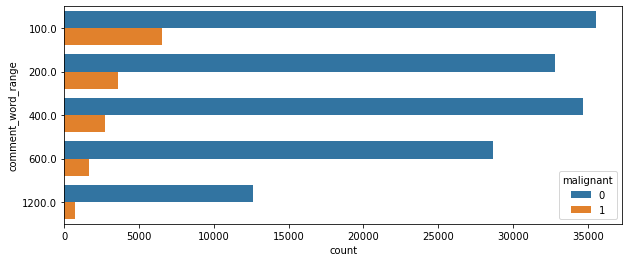

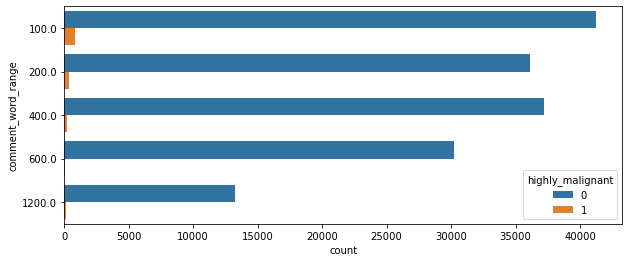

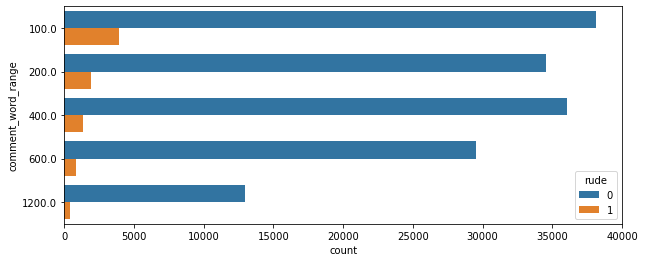

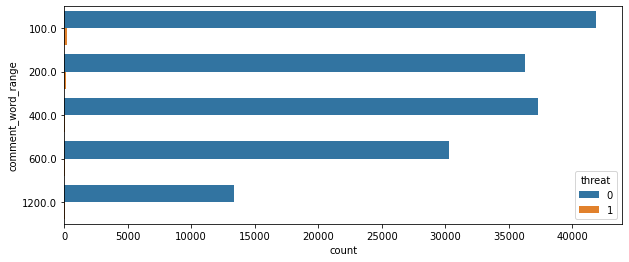

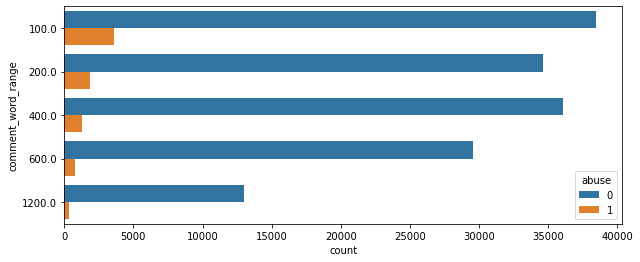

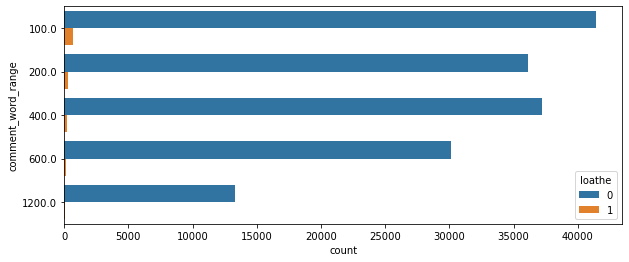

In [29]:
e=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in e:
    plt.figure(figsize=(10,4))
    sns.countplot(y='comment_word_range', hue= i, data=newset)
    plt.show()

<AxesSubplot:xlabel='length_of_comment', ylabel='Count'>

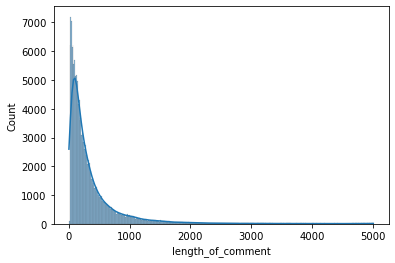

In [30]:
sns.histplot(data = newset['length_of_comment'], kde = True)

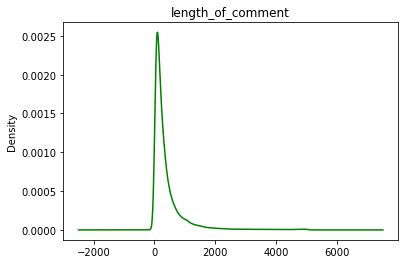

In [31]:
newset.length_of_comment.plot.density(color='green')
plt.title('length_of_comment')
plt.show()

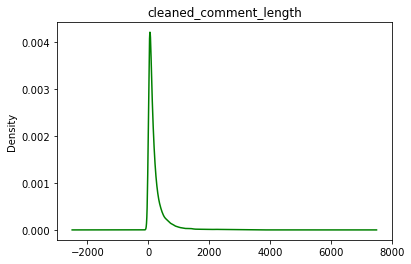

In [32]:
newset.cleaned_comment_length.plot.density(color='green')
plt.title('cleaned_comment_length')
plt.show()

In [33]:
newset.cleaned_comment_length.nunique()

2957

In [34]:
heatset=pd.read_csv('train.csv')
heatset.drop(columns=['id','comment_text'],inplace=True)

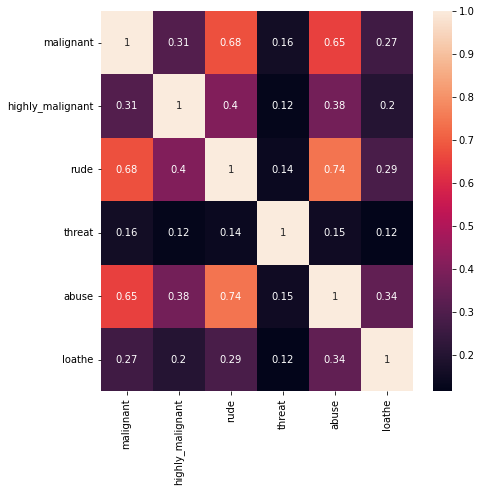

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(heatset.corr(), annot=True)
plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 159571/159571 [15:02<00:00, 176.72it/s]


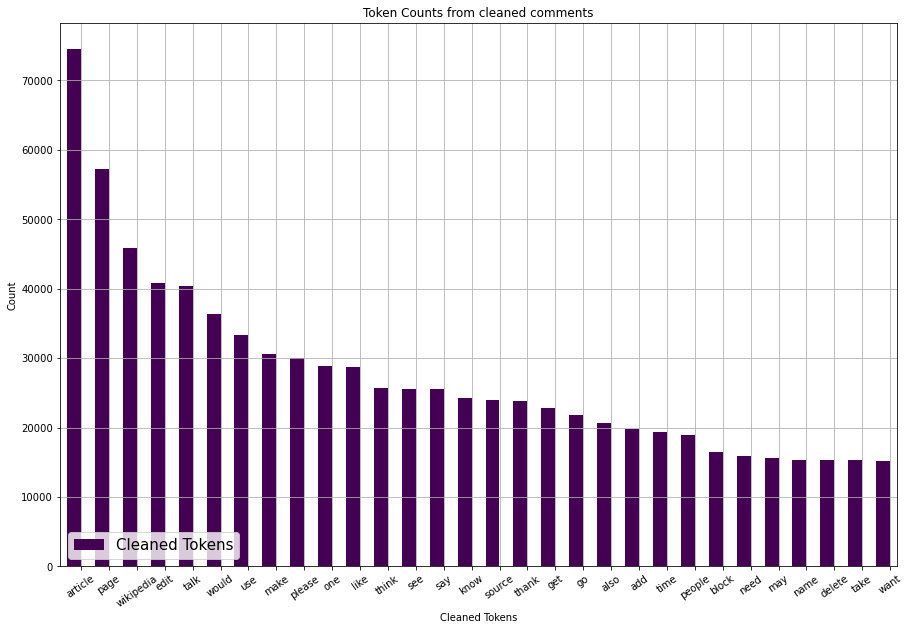

In [40]:
all_comment_words=""
for i in tqdm(range(0,len(newset.cleaned_comment))):
    y=newset.cleaned_comment[i]
    all_comment_words=all_comment_words+" "+y
    
cleaned_tokens = word_tokenize(all_comment_words)
cleaned_tokenized_counts = Counter(cleaned_tokens)
df__cleaned_tokenized = pd.DataFrame.from_dict(cleaned_tokenized_counts, orient="index").reset_index()

df__cleaned_tokenized.sort_values(by=0, ascending=False, inplace=True)
df__cleaned_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel="Cleaned Tokens", ylabel="Count", colormap="viridis", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from cleaned comments", legend=True).legend(["Cleaned Tokens"], loc="lower left", prop={"size":15})

100%|████████████████████████████████████████████████████████████████████████| 159571/159571 [1:58:14<00:00, 22.49it/s]


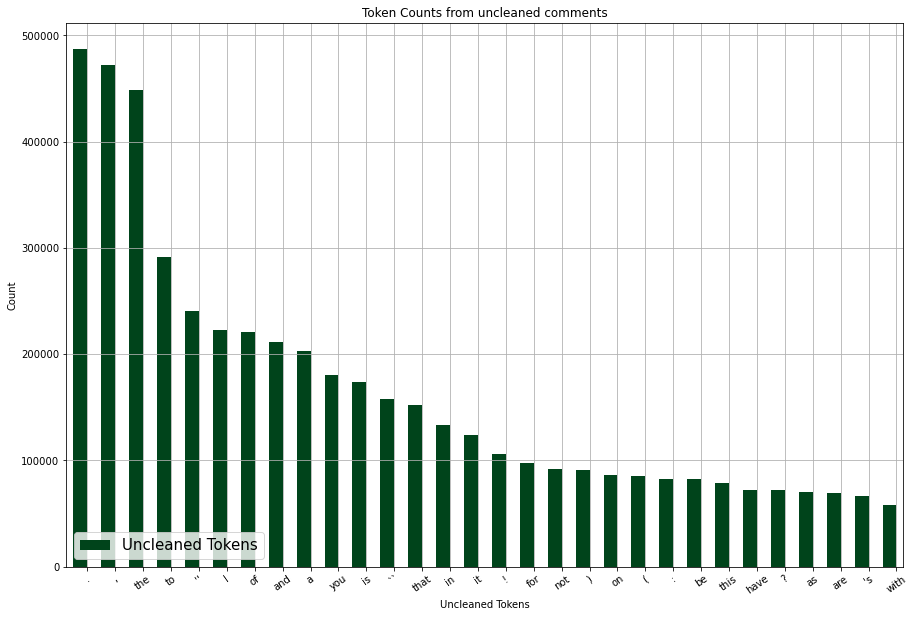

In [41]:
all_comment_words_uncleaned=""
for i in tqdm(range(0,len(newset.comment_text))):
    y=newset.comment_text[i]
    all_comment_words_uncleaned=all_comment_words_uncleaned+" "+y

uncleaned_tokens = word_tokenize(all_comment_words_uncleaned)
uncleaned_tokenized_counts = Counter(uncleaned_tokens)
df__uncleaned_tokenized = pd.DataFrame.from_dict(uncleaned_tokenized_counts, orient="index").reset_index()

df__uncleaned_tokenized.sort_values(by=0, ascending=False, inplace=True)
df__uncleaned_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel="Uncleaned Tokens", ylabel="Count", colormap="Greens_r", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from uncleaned comments", legend=True).legend(["Uncleaned Tokens"], loc="lower left", prop={"size":15})

In [36]:
def top_words(col):
    phrase=newset['cleaned_comment'][newset[col]==1]
    phrase_df=pd.DataFrame(phrase)
    phrase_df = phrase_df.reset_index()
    all_words_cleaned=""
    for i in tqdm(range(0,len(phrase_df.cleaned_comment))):
        y=phrase_df.cleaned_comment[i]
        all_words_cleaned=all_words_cleaned+" "+y

    tokens = word_tokenize(all_words_cleaned)
    tokenized_counts = Counter(tokens)
    df_tokenized = pd.DataFrame.from_dict(tokenized_counts, orient="index").reset_index()
    df_tokenized.sort_values(by=0, ascending=False, inplace=True)
    df_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel=str(col)+" Tokens", ylabel="Count", colormap="viridis", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from "+str(col)+" comments", legend=True).legend([str(col)+" Tokens"], loc="lower left", prop={"size":15})

100%|███████████████████████████████████████████████████████████████████████████| 1405/1405 [00:00<00:00, 70338.11it/s]


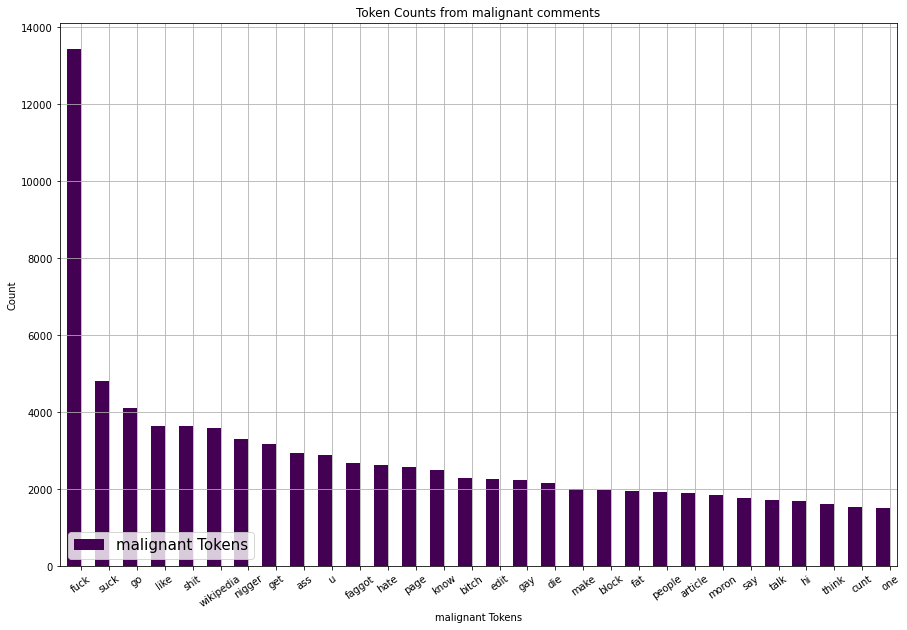

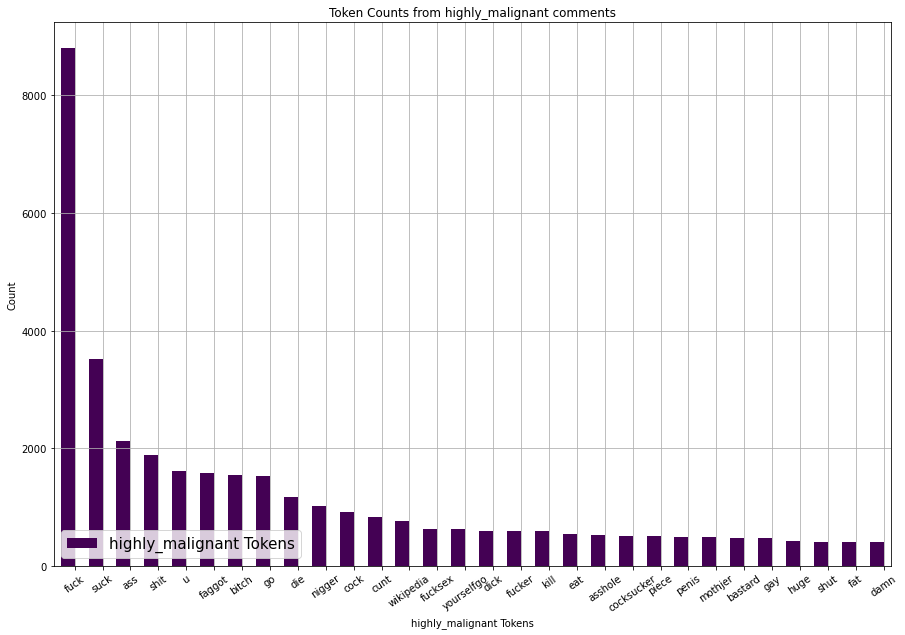

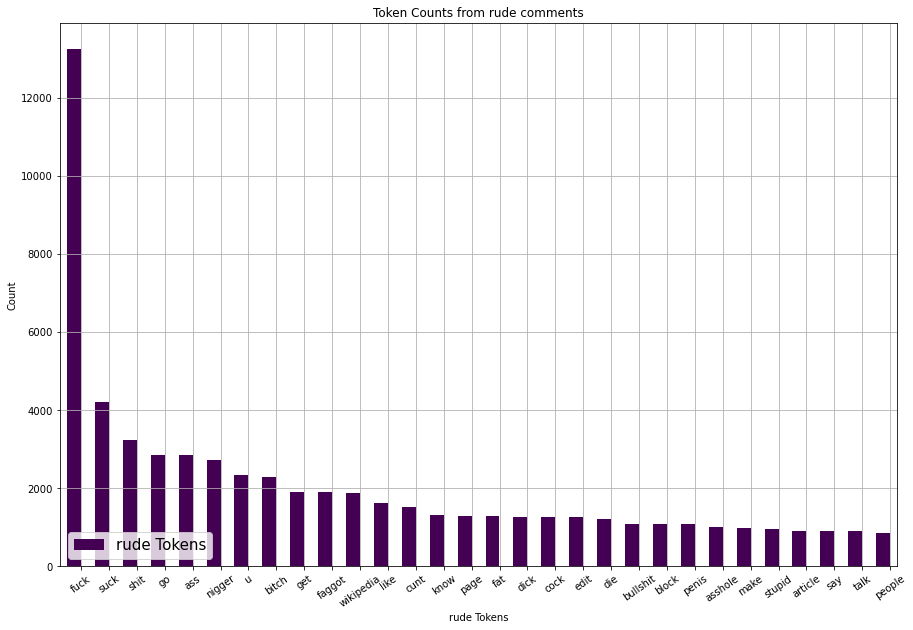

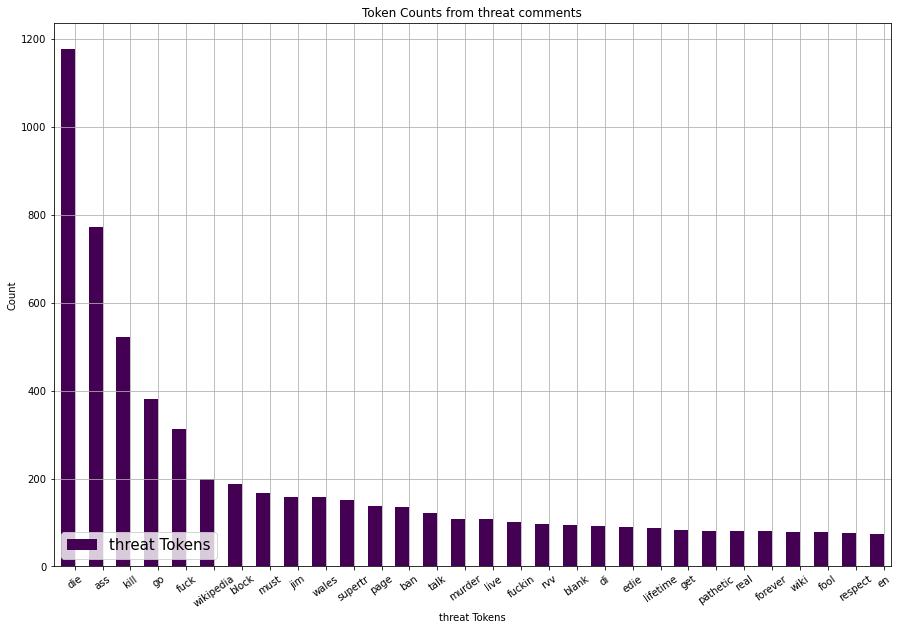

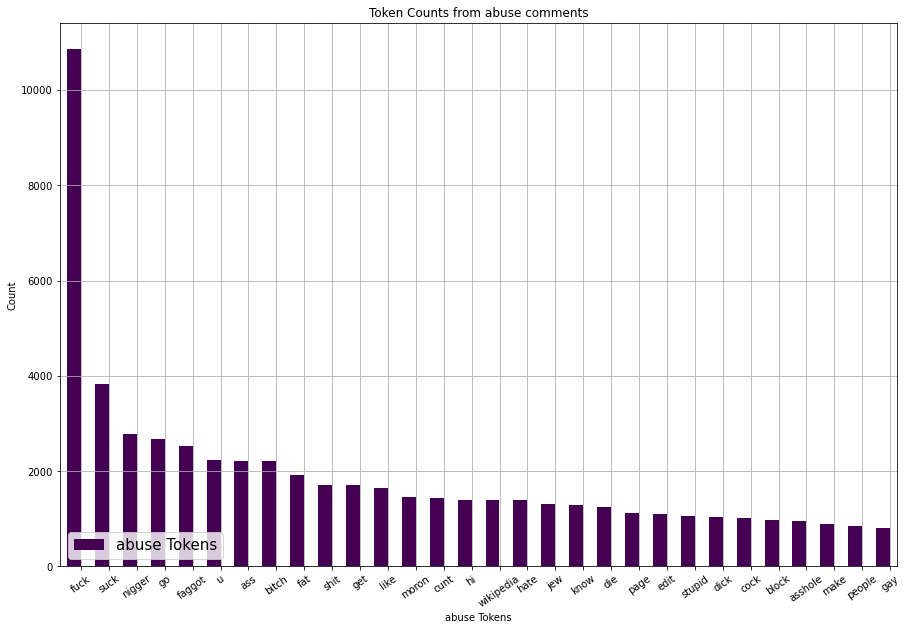

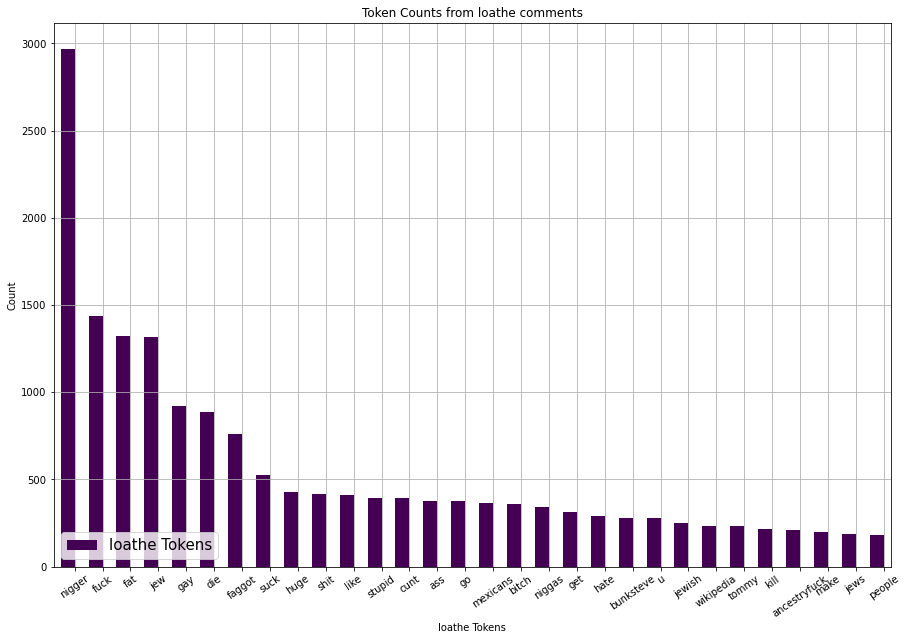

In [37]:
cols=['malignant','highly_malignant','rude','threat','abuse','loathe']
for col in cols:
    top_words(col)

In [38]:
newset.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length_of_comment,cleaned_comment,cleaned_comment_length,comment_word_range
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,explanation edit make username hardcore metall...,153,400.0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,aww match background colour seemingly stick th...,66,200.0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,hey man really try edit war guy constantly rem...,127,400.0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,ca make real suggestions improvement wonder se...,360,600.0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,sir hero chance remember page thats,35,100.0


In [39]:
newset.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe,length_of_comment,cleaned_comment_length,comment_word_range
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.138847,237.884591,380.268971
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.725381,373.603136,306.023042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,100.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,55.000000,100.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,121.000000,400.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,436.000000,259.000000,600.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000,5000.000000,1200.000000


Observations:
1.	Malignant, highly malignant, rude, threat, abuse, loathe labelled as are very minor as majority of the data is non-malignant.
2.	Malignant has maximum compared to all the other labels.
3.	Comments constructed with less than 100 words have more malignant, highly malignant, rude, threat, abuse and loath comments and words with above 1200 has minimum set of it.
4.	Malignant, rude and abuse comments are highly co-relative to each other.
5.	In uncleaned comments most used words are punctuations and stop words.
6.	In cleaned comments most used words is ‘article’, followed by page, Wikipedia, edit and talk.
7.	Most comment have a word count of below 100 and minimum comments have a word count of above 1200.
8.	Top words for malignant comments are ‘fuck’, ‘suck’, ‘go’, ‘shit’.
9.	Top words for highly malignant, abuse and rude comments are same as malignant.
10.	The top word for threat comment is ‘kill’ followed by ‘die’.
11.	The top word for loathe comment is ‘nigger’.
12.	Average comment length for uncleaned comment is 394 words.	 
13.	Average comment length for cleaned comment is 238 words.


# Model Training

In [40]:
X=newset['cleaned_comment']
y=newset['malignant']
X.head()

0    explanation edit make username hardcore metall...
1    aww match background colour seemingly stick th...
2    hey man really try edit war guy constantly rem...
3    ca make real suggestions improvement wonder se...
4                  sir hero chance remember page thats
Name: cleaned_comment, dtype: object

In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: malignant, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,stratify=y)

In [43]:
y_train.value_counts()

0    115421
1     12235
Name: malignant, dtype: int64

In [44]:
y_test.value_counts()

0    28856
1     3059
Name: malignant, dtype: int64

In [45]:
text_clf_1= Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [46]:
text_clf_1.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [47]:
p1=text_clf_1.predict(X_test)

In [48]:
print(classification_report(p1, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     29429
           1       0.70      0.86      0.77      2486

    accuracy                           0.96     31915
   macro avg       0.84      0.92      0.88     31915
weighted avg       0.97      0.96      0.96     31915



In [49]:
text_clf_2= Pipeline([('tfidf',TfidfVectorizer()),('log',LogisticRegression())])
text_clf_2.fit(X_train,y_train)
p2=text_clf_2.predict(X_test)
print(classification_report(p2, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     29899
           1       0.60      0.92      0.73      2016

    accuracy                           0.96     31915
   macro avg       0.80      0.94      0.85     31915
weighted avg       0.97      0.96      0.96     31915



In [50]:
text_clf_3= Pipeline([('tfidf',TfidfVectorizer()),('log',XGBClassifier())])
text_clf_3.fit(X_train,y_train)
p3=text_clf_3.predict(X_test)
print(classification_report(p3, y_test))

[21:41:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     29879
           1       0.59      0.89      0.71      2036

    accuracy                           0.95     31915
   macro avg       0.79      0.92      0.84     31915
weighted avg       0.97      0.95      0.96     31915



In [51]:
text_clf_4= Pipeline([('tfidf',TfidfVectorizer()),('log',KNeighborsClassifier())])
text_clf_4.fit(X_train,y_train)
p4=text_clf_4.predict(X_test)
print(classification_report(p4, y_test))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     31226
           1       0.19      0.85      0.31       689

    accuracy                           0.92     31915
   macro avg       0.59      0.89      0.64     31915
weighted avg       0.98      0.92      0.94     31915



In [52]:
text_clf_5= Pipeline([('tfidf',TfidfVectorizer()),('log',RandomForestClassifier())])
text_clf_5.fit(X_train,y_train)
p5=text_clf_5.predict(X_test)
print(classification_report(p5, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     30111
           1       0.54      0.92      0.68      1804

    accuracy                           0.95     31915
   macro avg       0.77      0.94      0.83     31915
weighted avg       0.97      0.95      0.96     31915



# Hyperparameter Tuning

In [53]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [54]:
tfidf=TfidfVectorizer()
clf1=LogisticRegression()
pipe1=make_pipeline(tfidf,clf1)

In [55]:
params={}
params['logisticregression__C']=[100, 10, 1.0, 0.1, 0.01]
params['logisticregression__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
params['logisticregression__penalty'] = ['l2','l1']

In [56]:
params

{'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
 'logisticregression__penalty': ['l2', 'l1']}

In [57]:
grid1=gs(pipe1,params,cv=cv,scoring='accuracy',verbose=10)
grid1.fit(X_train,y_train)

Fitting 30 folds for each of 30 candidates, totalling 900 fits
[CV 1/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 1/30; 1/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.956 total time=   8.2s
[CV 2/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 2/30; 1/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.952 total time=   7.8s
[CV 3/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 3/30; 1/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.958 total time=   7.8s
[CV 4/30; 1/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 4/30; 1/30] EN

[CV 1/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.8s
[CV 2/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 2/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.952 total time=   5.8s
[CV 3/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 3/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.959 total time=   5.8s
[CV 4/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 4/30; 2/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.955 total time=   5.8s
[CV 5/30; 2/30] START logisticregression__C=100, logisticregression__penalty=l

[CV 3/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.958 total time=   4.7s
[CV 4/30; 3/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 4/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.955 total time=   4.9s
[CV 5/30; 3/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 5/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.955 total time=   4.8s
[CV 6/30; 3/30] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 6/30; 3/30] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.956 total time=   5.2s
[CV 7/30; 3/30] START logisticregression__C=100, l

[CV 4/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 5/30; 4/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 5/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 6/30; 4/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 6/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 7/30; 4/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 7/30; 4/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 8/30; 4/30] START logisticregression__C=100, logisticr

[CV 5/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 6/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 6/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 7/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 7/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 8/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 8/30; 5/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 9/30; 5/30] START logisticregression__C=100, logisticregression__penalty=l1, logis

[CV 7/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.946 total time=   7.2s
[CV 8/30; 6/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 8/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.950 total time=   7.3s
[CV 9/30; 6/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 9/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.947 total time=   7.4s
[CV 10/30; 6/30] START logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 10/30; 6/30] END logisticregression__C=100, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.946 total time=   7.4s
[CV 11/30; 6/30] START logisticregression__C=100

[CV 8/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.960 total time=   6.1s
[CV 9/30; 7/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 9/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.959 total time=   6.1s
[CV 10/30; 7/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 10/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.958 total time=   6.1s
[CV 11/30; 7/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 11/30; 7/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.960 total time=   6.5s
[CV 12/30; 7/30] START logisticregression__C=10, logi

[CV 10/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.7s
[CV 11/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 11/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.960 total time=   5.8s
[CV 12/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 12/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.957 total time=   5.8s
[CV 13/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 13/30; 8/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.8s
[CV 14/30; 8/30] START logisticregression__C=10, logisticregression__penalty=l

[CV 12/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.957 total time=   3.9s
[CV 13/30; 9/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 13/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.958 total time=   3.9s
[CV 14/30; 9/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 14/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.959 total time=   3.8s
[CV 15/30; 9/30] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 15/30; 9/30] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.960 total time=   3.8s
[CV 16/30; 9/30] START logisticregression__C=10, l

[CV 13/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 14/30; 10/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 14/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 15/30; 10/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 15/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 16/30; 10/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 16/30; 10/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 17/30; 10/30] START logisticregression__C=10, l

[CV 15/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 16/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 16/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 17/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 17/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 18/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 18/30; 11/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 19/30; 11/30] START logisticregression__C=10, logisticregression__penalty=l

[CV 17/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.959 total time=   4.5s
[CV 18/30; 12/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 18/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.956 total time=   4.5s
[CV 19/30; 12/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 19/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.959 total time=   4.5s
[CV 20/30; 12/30] START logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 20/30; 12/30] END logisticregression__C=10, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.958 total time=   4.7s
[CV 21/30; 12/30] START logisticregression_

[CV 18/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.955 total time=   5.1s
[CV 19/30; 13/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 19/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.959 total time=   5.0s
[CV 20/30; 13/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 20/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.958 total time=   5.0s
[CV 21/30; 13/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 21/30; 13/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.957 total time=   5.1s
[CV 22/30; 13/30] START logisticregr

[CV 19/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.959 total time=   5.7s
[CV 20/30; 14/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 20/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.958 total time=   5.7s
[CV 21/30; 14/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 21/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.957 total time=   5.8s
[CV 22/30; 14/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 22/30; 14/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.959 total time=   5.8s
[CV 23/30; 14/30] START logisticregression__C=1.0, logisticregre

[CV 20/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.958 total time=   3.4s
[CV 21/30; 15/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 21/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.957 total time=   3.4s
[CV 22/30; 15/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 22/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.959 total time=   3.4s
[CV 23/30; 15/30] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 23/30; 15/30] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.955 total time=   3.4s
[CV 24/30; 15/30] START logisticregr

[CV 21/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 22/30; 16/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 22/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 23/30; 16/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 23/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 24/30; 16/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 24/30; 16/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 25/30; 16/30] START logisticregression__

[CV 23/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 24/30; 17/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 24/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 25/30; 17/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 25/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 26/30; 17/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 26/30; 17/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 27/30; 17/30] START logisticregression__C=1.0, logisticregression__p

[CV 24/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.959 total time=   3.3s
[CV 25/30; 18/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 25/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.961 total time=   3.4s
[CV 26/30; 18/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 26/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.958 total time=   3.4s
[CV 27/30; 18/30] START logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 27/30; 18/30] END logisticregression__C=1.0, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.962 total time=   3.3s
[CV 28/30; 18/30] START logisticregr

[CV 25/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.938 total time=   4.2s
[CV 26/30; 19/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 26/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.937 total time=   4.2s
[CV 27/30; 19/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 27/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.938 total time=   4.2s
[CV 28/30; 19/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 28/30; 19/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.937 total time=   4.2s
[CV 29/30; 19/30] START logisticregr

[CV 27/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.938 total time=   4.3s
[CV 28/30; 20/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 28/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.937 total time=   4.3s
[CV 29/30; 20/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 29/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.936 total time=   3.9s
[CV 30/30; 20/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 30/30; 20/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.938 total time=   4.3s
[CV 1/30; 21/30] START logisticregression__C=0.1, logisticregres

[CV 28/30; 21/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.937 total time=   3.1s
[CV 29/30; 21/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 29/30; 21/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.936 total time=   3.1s
[CV 30/30; 21/30] START logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 30/30; 21/30] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.938 total time=   3.1s
[CV 1/30; 22/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 1/30; 22/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 2/30; 22/30] START logisticregressio

[CV 29/30; 22/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 30/30; 22/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 30/30; 22/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 1/30; 23/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 1/30; 23/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 2/30; 23/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 2/30; 23/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 3/30; 23/30] START logisticregression__C=0.1, logisticregres

[CV 1/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.950 total time=   3.1s
[CV 2/30; 24/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 2/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.948 total time=   3.2s
[CV 3/30; 24/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 3/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.950 total time=   3.1s
[CV 4/30; 24/30] START logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 4/30; 24/30] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.949 total time=   3.1s
[CV 5/30; 24/30] START logisticregression__

[CV 2/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.910 total time=   4.0s
[CV 3/30; 25/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 3/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.911 total time=   3.9s
[CV 4/30; 25/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 4/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.910 total time=   4.0s
[CV 5/30; 25/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg
[CV 5/30; 25/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg;, score=0.911 total time=   3.9s
[CV 6/30; 25/30] START logisticregre

[CV 3/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.911 total time=   3.4s
[CV 4/30; 26/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 4/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.910 total time=   3.4s
[CV 5/30; 26/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 5/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.911 total time=   3.4s
[CV 6/30; 26/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs
[CV 6/30; 26/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=lbfgs;, score=0.910 total time=   3.4s
[CV 7/30; 26/30] START logisticregression__C=0.01, logisticregre

[CV 4/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.910 total time=   3.0s
[CV 5/30; 27/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 5/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.911 total time=   3.0s
[CV 6/30; 27/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 6/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.910 total time=   3.0s
[CV 7/30; 27/30] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear
[CV 7/30; 27/30] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear;, score=0.910 total time=   3.0s
[CV 8/30; 27/30] START logisticregre

[CV 5/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 6/30; 28/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 6/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 7/30; 28/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 7/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.5s
[CV 8/30; 28/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg
[CV 8/30; 28/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=newton-cg;, score=nan total time=   2.4s
[CV 9/30; 28/30] START logisticregression__C

[CV 6/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 7/30; 29/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 7/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 8/30; 29/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 8/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 9/30; 29/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs
[CV 9/30; 29/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=lbfgs;, score=nan total time=   2.4s
[CV 10/30; 29/30] START logisticregression__C=0.01, logisticregression__

[CV 7/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.924 total time=   2.9s
[CV 8/30; 30/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 8/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.924 total time=   3.0s
[CV 9/30; 30/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 9/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.925 total time=   3.0s
[CV 10/30; 30/30] START logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear
[CV 10/30; 30/30] END logisticregression__C=0.01, logisticregression__penalty=l1, logisticregression__solver=liblinear;, score=0.924 total time=   3.0s
[CV 11/30; 30/30] START logisticre

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
                         'logisticregression__penalty': ['l2', 'l1'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear']},
             scoring='accuracy', verbose=10)

In [58]:
grid1.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [55]:
text_clf_6= Pipeline([('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(C=10, solver='liblinear'))])
text_clf_6.fit(X_train,y_train)
p6=text_clf_6.predict(X_test)
print(classification_report(p6, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     29448
           1       0.69      0.86      0.77      2467

    accuracy                           0.96     31915
   macro avg       0.84      0.92      0.87     31915
weighted avg       0.97      0.96      0.96     31915



In [56]:
clf2=LinearSVC()
pipe2=make_pipeline(tfidf,clf2)
parameters={}
parameters['linearsvc__C']=[100,10, 1.0, 0.1, 0.01]
parameters['linearsvc__penalty'] = ['l2']

In [57]:
parameters

{'linearsvc__C': [100, 10, 1.0, 0.1, 0.01], 'linearsvc__penalty': ['l2']}

In [58]:
grid2=gs(pipe2,parameters,cv=cv,scoring='accuracy',verbose=10)
grid2.fit(X_train,y_train)

Fitting 30 folds for each of 5 candidates, totalling 150 fits
[CV 1/30; 1/5] START linearsvc__C=100, linearsvc__penalty=l2....................
[CV 1/30; 1/5] END linearsvc__C=100, linearsvc__penalty=l2;, score=0.940 total time=   8.2s
[CV 2/30; 1/5] START linearsvc__C=100, linearsvc__penalty=l2....................
[CV 2/30; 1/5] END linearsvc__C=100, linearsvc__penalty=l2;, score=0.939 total time=   8.3s
[CV 3/30; 1/5] START linearsvc__C=100, linearsvc__penalty=l2....................
[CV 3/30; 1/5] END linearsvc__C=100, linearsvc__penalty=l2;, score=0.941 total time=   8.2s
[CV 4/30; 1/5] START linearsvc__C=100, linearsvc__penalty=l2....................
[CV 4/30; 1/5] END linearsvc__C=100, linearsvc__penalty=l2;, score=0.938 total time=   8.8s
[CV 5/30; 1/5] START linearsvc__C=100, linearsvc__penalty=l2....................
[CV 5/30; 1/5] END linearsvc__C=100, linearsvc__penalty=l2;, score=0.938 total time=   8.4s
[CV 6/30; 1/5] START linearsvc__C=100, linearsvc__penalty=l2.............

[CV 18/30; 2/5] END linearsvc__C=10, linearsvc__penalty=l2;, score=0.952 total time=   5.4s
[CV 19/30; 2/5] START linearsvc__C=10, linearsvc__penalty=l2....................
[CV 19/30; 2/5] END linearsvc__C=10, linearsvc__penalty=l2;, score=0.951 total time=   5.5s
[CV 20/30; 2/5] START linearsvc__C=10, linearsvc__penalty=l2....................
[CV 20/30; 2/5] END linearsvc__C=10, linearsvc__penalty=l2;, score=0.947 total time=   5.8s
[CV 21/30; 2/5] START linearsvc__C=10, linearsvc__penalty=l2....................
[CV 21/30; 2/5] END linearsvc__C=10, linearsvc__penalty=l2;, score=0.950 total time=   5.7s
[CV 22/30; 2/5] START linearsvc__C=10, linearsvc__penalty=l2....................
[CV 22/30; 2/5] END linearsvc__C=10, linearsvc__penalty=l2;, score=0.954 total time=   5.7s
[CV 23/30; 2/5] START linearsvc__C=10, linearsvc__penalty=l2....................
[CV 23/30; 2/5] END linearsvc__C=10, linearsvc__penalty=l2;, score=0.951 total time=   5.8s
[CV 24/30; 2/5] START linearsvc__C=10, line

[CV 6/30; 4/5] END linearsvc__C=0.1, linearsvc__penalty=l2;, score=0.955 total time=   3.3s
[CV 7/30; 4/5] START linearsvc__C=0.1, linearsvc__penalty=l2....................
[CV 7/30; 4/5] END linearsvc__C=0.1, linearsvc__penalty=l2;, score=0.959 total time=   3.2s
[CV 8/30; 4/5] START linearsvc__C=0.1, linearsvc__penalty=l2....................
[CV 8/30; 4/5] END linearsvc__C=0.1, linearsvc__penalty=l2;, score=0.957 total time=   3.3s
[CV 9/30; 4/5] START linearsvc__C=0.1, linearsvc__penalty=l2....................
[CV 9/30; 4/5] END linearsvc__C=0.1, linearsvc__penalty=l2;, score=0.957 total time=   3.2s
[CV 10/30; 4/5] START linearsvc__C=0.1, linearsvc__penalty=l2...................
[CV 10/30; 4/5] END linearsvc__C=0.1, linearsvc__penalty=l2;, score=0.958 total time=   3.3s
[CV 11/30; 4/5] START linearsvc__C=0.1, linearsvc__penalty=l2...................
[CV 11/30; 4/5] END linearsvc__C=0.1, linearsvc__penalty=l2;, score=0.958 total time=   3.2s
[CV 12/30; 4/5] START linearsvc__C=0.1, l

[CV 24/30; 5/5] END linearsvc__C=0.01, linearsvc__penalty=l2;, score=0.937 total time=   3.3s
[CV 25/30; 5/5] START linearsvc__C=0.01, linearsvc__penalty=l2..................
[CV 25/30; 5/5] END linearsvc__C=0.01, linearsvc__penalty=l2;, score=0.939 total time=   3.4s
[CV 26/30; 5/5] START linearsvc__C=0.01, linearsvc__penalty=l2..................
[CV 26/30; 5/5] END linearsvc__C=0.01, linearsvc__penalty=l2;, score=0.937 total time=   3.3s
[CV 27/30; 5/5] START linearsvc__C=0.01, linearsvc__penalty=l2..................
[CV 27/30; 5/5] END linearsvc__C=0.01, linearsvc__penalty=l2;, score=0.939 total time=   3.3s
[CV 28/30; 5/5] START linearsvc__C=0.01, linearsvc__penalty=l2..................
[CV 28/30; 5/5] END linearsvc__C=0.01, linearsvc__penalty=l2;, score=0.939 total time=   3.3s
[CV 29/30; 5/5] START linearsvc__C=0.01, linearsvc__penalty=l2..................
[CV 29/30; 5/5] END linearsvc__C=0.01, linearsvc__penalty=l2;, score=0.935 total time=   3.2s
[CV 30/30; 5/5] START linearsvc

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('linearsvc', LinearSVC())]),
             param_grid={'linearsvc__C': [100, 10, 1.0, 0.1, 0.01],
                         'linearsvc__penalty': ['l2']},
             scoring='accuracy', verbose=10)

In [59]:
grid2.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC())])

In [60]:
text_clf_7= Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('linearsvc', LinearSVC())])
text_clf_7.fit(X_train,y_train)
p7=text_clf_7.predict(X_test)
print(classification_report(p7, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     29429
           1       0.70      0.86      0.77      2486

    accuracy                           0.96     31915
   macro avg       0.84      0.92      0.88     31915
weighted avg       0.97      0.96      0.96     31915



In [61]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, p1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, p2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, p3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, p4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, p5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, p6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, p7)

print('roc_auc_score for Linear SVC: ', roc_auc_score(y_test, p1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, p2))
print('roc_auc_score for XGB Classifier: ', roc_auc_score(y_test, p3))
print('roc_auc_score for KNeighbors Classifier: ', roc_auc_score(y_test, p4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, p5))
print('roc_auc_score for Tuned Logistic Regression: ', roc_auc_score(y_test, p6))
print('roc_auc_score for Tuned Linear SVC: ', roc_auc_score(y_test, p7))

roc_auc_score for Linear SVC:  0.8439730048442908
roc_auc_score for Logistic Regression:  0.7993292697184555
roc_auc_score for XGB Classifier:  0.7913899811878268
roc_auc_score for KNeighbors Classifier:  0.5945405500346979
roc_auc_score for Random Forest Classifier:  0.7693776904230659
roc_auc_score for Tuned Logistic Regression:  0.8415905328919386
roc_auc_score for Tuned Linear SVC:  0.8439730048442908


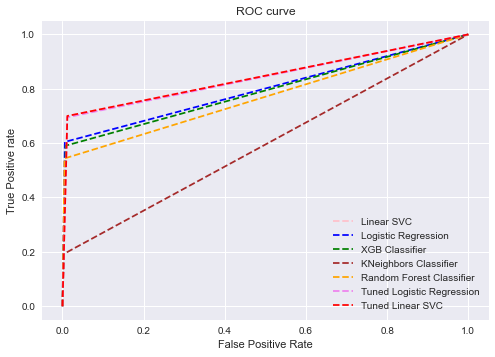

In [62]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--', color='pink', label='Linear SVC')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--', color='blue', label='Logistic Regression')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--',color='green', label='XGB Classifier')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--',color='brown', label='KNeighbors Classifier')
plt.plot(false_positive_rate5, true_positive_rate5, linestyle='--',color='orange', label='Random Forest Classifier')
plt.plot(false_positive_rate6, true_positive_rate6, linestyle='--',color='violet', label='Tuned Logistic Regression')
plt.plot(false_positive_rate7, true_positive_rate7, linestyle='--',color='red', label='Tuned Linear SVC')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [63]:
#saving the model
log_reg_text_classifier= pickle.dumps(text_clf_7)

In [64]:
label_to_predict=test_comments_set[0]
test_set_label=text_clf_7.predict(label_to_predict)

In [65]:
#saving the predicted data
df_test_label=pd.DataFrame(list(zip(test_set_label)))
file_name = 'test_labels.csv'
df_test_label.to_csv(file_name)